<a href="https://colab.research.google.com/github/sumanapalle065/LLM-Assign3/blob/Evaluation/LLM_Assign3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First and foremost we start by installing 'transformers' for this project.

In [1]:
!pip install transformers datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.5 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


In [2]:
import warnings #imported the warning module to ignore the unnecessary warnings from the code.
warnings.filterwarnings('ignore')

The following are the necessary imports that are essential to develop the LLM Model. This particular dataset focuses on identifying offensive words, hate speech and derogatory language for text classification. Given the amount of data being generated on the social media everyday it is important to train models to filter offensive content to avoid harmful content. This dataset contains the labels '1' and '0' for offensive and non-offensive words respectively.

In [3]:
import pandas as llm_pds

llm_offendata = llm_pds.read_parquet("hf://datasets/valurank/offensive-multi/data/train-00000-of-00001.parquet");

In [4]:
llm_offendata.info() #getting the information of the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36593 entries, 0 to 36592
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   source  36593 non-null  object
 1   text    36593 non-null  object
 2   label   36593 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 857.8+ KB


In [5]:
llm_offendata.head()

,source,text,label
0,hate_speech_offensive,!!! : as a woman you shouldnt complain about ...,0
1,hate_speech_offensive,!!!!! : boy dats cold...tyga dwn bad for cuff...,1
2,hate_speech_offensive,!!!!!!! dawg!!!! : you ever fuck a bitch an...,1
3,hate_speech_offensive,!!!!!!!!! : she look like a tranny,1
4,hate_speech_offensive,!!!!!!!!!!!!! : the shit you hear about me mi...,1


In [6]:
llm_offendata.text.to_list()[0:20]

['!!!  : as a woman you shouldnt complain about cleaning up your house. ; as a man you should always take the trash out...',
 '!!!!!  : boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!',
 '!!!!!!!   dawg!!!!  : you ever fuck a bitch and she start to cry? you be confused as shit',
 '!!!!!!!!!  :  she look like a tranny',
 '!!!!!!!!!!!!!  : the shit you hear about me might be true or it might be faker than the bitch who told it to ya &;',
 '!!!!!!!!!!!!!!!!!!": the shit just blows me..claim you so faithful and down for somebody but still fucking with hoes! &;&;&;"',
 '!!!!!!": i can not just sit up and hate on another bitch .. i got too much shit going on!"',
 '!!!!&;: cause im tired of you big bitches coming for us skinny girls!!&;',
 '" ; you might not get ya bitch back ; thats that "',
 '"  :hobbies include: fighting mariam"\n\nbitch',
 '" keeks is a bitch she curves everyone " lol i walked into a conversation like this. smh',
 '" murda gang bitch its gang land "',
 

# Data Cleaning

In [7]:
import re as llm_re #Import the regular expressions module to match and manipulate text patterns.
import nltk as llm_nltk #Import the Natural Language Toolkit for various NLP tasks.
from nltk.corpus import stopwords as sw #Import NLTK's stopwords module to filter out frequent stop words in text.
from nltk.stem import WordNetLemmatizer #Use the WordNetLemmatizer from NLTK to reduce words to their base or root form.


#Downloading the necessary NLTK data files
llm_nltk.download('stopwords')
llm_nltk.download('wordnet')

#Initializing the lemmatizer and the stop words.
lemm = WordNetLemmatizer()
llm_StopWords = set(sw.words('english'))

def CleanText(textdata):
    #Lowercase the text tto maintain uniformity
    textdata = textdata.lower()

    #Removing the punctuation and  the special characters
    textdata = llm_re.sub(r'[^\w\s]', '', textdata)

    #Tokenizing the text into words
    wrdsdt = textdata.split()

    #Removing stop words and lemmatized
    wrdsdt = [lemm.lemmatize(wrd) for wrd in wrdsdt if wrd not in llm_StopWords]

    #Joining the words back into the single string
    CleanedText = ' '.join(wrdsdt)

    return CleanedText

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


The text is cleaned and processed. Regular expressions are used to search for text patterns and some of the common words which do not provide any significant meaning ('it', 'of', 'in', etc)are eliminated.

In [8]:
# Apply the clean_text method to the 'text' column
llm_offendata['text'] = llm_offendata['text'].apply(CleanText)

In [9]:
llm_offendata.text.to_list()[0:20]

['woman shouldnt complain cleaning house man always take trash',
 'boy dat coldtyga dwn bad cuffin dat hoe 1st place',
 'dawg ever fuck bitch start cry confused shit',
 'look like tranny',
 'shit hear might true might faker bitch told ya',
 'shit blow meclaim faithful somebody still fucking hoe',
 'sit hate another bitch got much shit going',
 'cause im tired big bitch coming u skinny girl',
 'might get ya bitch back thats',
 'hobby include fighting mariam bitch',
 'keeks bitch curve everyone lol walked conversation like smh',
 'murda gang bitch gang land',
 'hoe smoke loser yea go ig',
 'bad bitch thing like',
 'bitch get',
 'bitch nigga miss',
 'bitch plz whatever',
 'bitch love',
 'bitch get cut everyday b',
 'black bottle bad bitch']

**Handling Missing Values**

In [10]:
llm_offendata.isnull().sum()

,0
source,0
text,0
label,0


The above results indicate that there are no missing values.

# Exploring the Data

Visualizing the data can provide valuable insights into the distributions of offensive and inoffensive classes, enabling a deeper understanding of patterns relevant to text classification

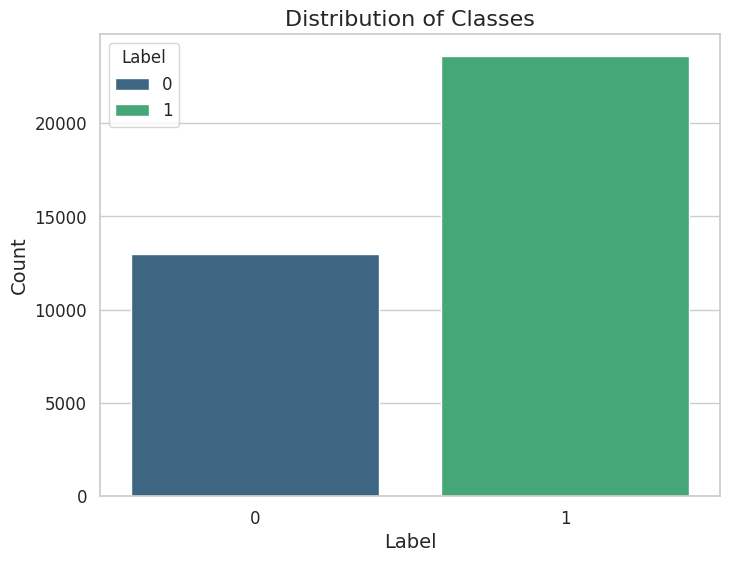

In [11]:
import seaborn as llm_senb
import matplotlib.pyplot as llm_mtplot

llm_senb.set(style="whitegrid")

# Displaying the distribution of two classes '0' (non-offensive) and '1' (offensive)
llm_mtplot.figure(figsize=(8, 6))
llm_senb.countplot(x='label', hue='label', data=llm_offendata, palette='viridis', dodge=False)
llm_mtplot.title('Distribution of Classes', fontsize=16)
llm_mtplot.xlabel('Label', fontsize=14)
llm_mtplot.ylabel('Count', fontsize=14)
llm_mtplot.xticks(fontsize=12)
llm_mtplot.yticks(fontsize=12)
llm_mtplot.legend(title='Label', fontsize=12)
llm_mtplot.show()

Since there are two classes '0' and '1' their distribution is observed. Clearly the offensive words (>20,000) are more than the non-offensive words (<15,000)

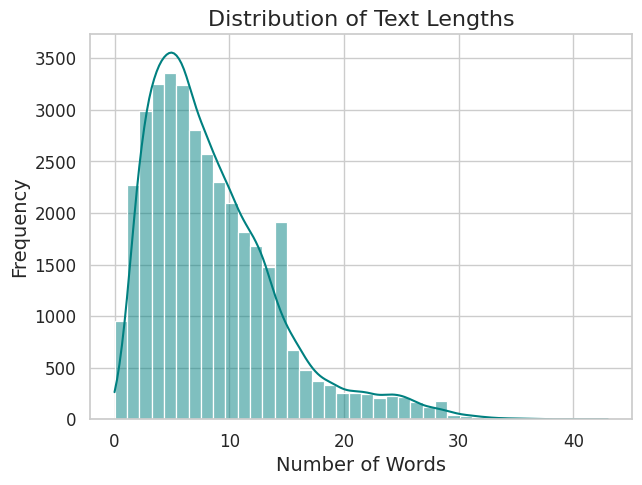

In [12]:
# Calculating the number of the words in each text entry
llm_offendata['text_length'] = llm_offendata['text'].apply(lambda x: len(x.split()))

# Distribution for the length of the texts
llm_mtplot.figure(figsize=(7, 5))
llm_senb.histplot(llm_offendata['text_length'], kde=True, color='teal', bins=40)
llm_mtplot.title('Distribution of Text Lengths', fontsize=16)
llm_mtplot.xlabel('Number of Words', fontsize=14)
llm_mtplot.ylabel('Frequency', fontsize=14)
llm_mtplot.xticks(fontsize=12)
llm_mtplot.yticks(fontsize=12)
llm_mtplot.show()

The length of each text entry is calculated. The distribution above shows that shorter texts are more frequent than the longer ones. The highest frequency is between 0 to 10. The frequecy gradually decreases showing that longer texts are less frequent.

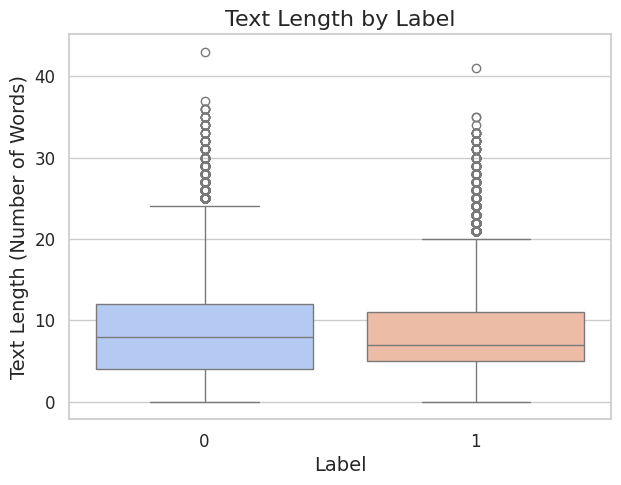

In [13]:
# Boxplot of text length for each label
llm_mtplot.figure(figsize=(7, 5))
llm_senb.boxplot(x='label', y='text_length', hue='label', data=llm_offendata, palette='coolwarm')
llm_mtplot.title('Text Length by Label', fontsize=16)
llm_mtplot.xlabel('Label', fontsize=14)
llm_mtplot.ylabel('Text Length (Number of Words)', fontsize=14)
llm_mtplot.xticks(fontsize=12)
llm_mtplot.yticks(fontsize=12)
llm_mtplot.legend([],[], frameon=False)
llm_mtplot.show()

The boxplot of text lengths across two categories labeled ‘0’ and ‘1’. Each box represents the interquartile range (IQR), showing the middle 50% of data points, with a line indicating the median value. The category labeled ‘0’ has a lower median text length and a tighter IQR compared to category ‘1’, indicating that texts in category ‘0’ tend to be shorter and more consistent in length than those in category ‘1’

**Exploring 0 class data**

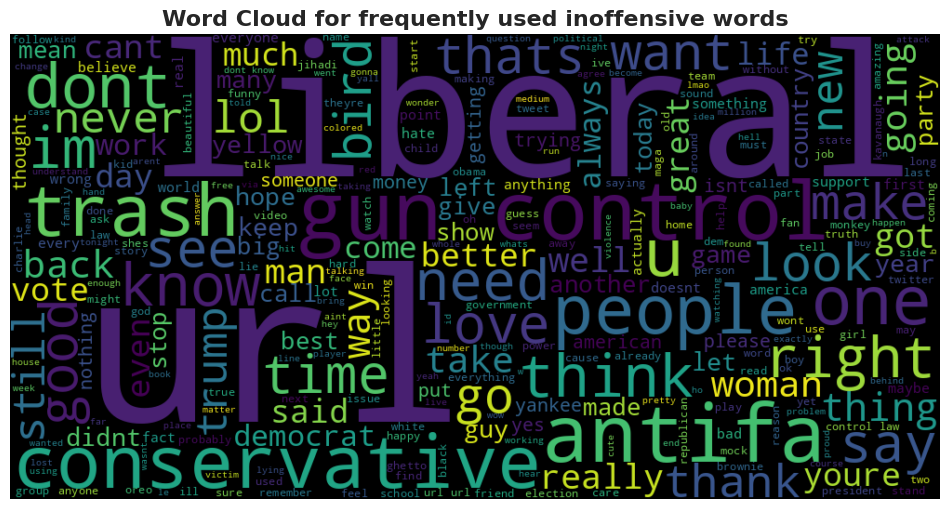

In [14]:
from wordcloud import WordCloud as Wcloud

# Filter the DataFrame for label 0
offend_label_0_text = llm_offendata[llm_offendata['label'] == 0]['text']

# Concatenate all text data for label 0 into one string
all_text_label_0 = ' '.join(offend_label_0_text)

# Generate the word cloud with additional styling for label 0
label_0_wordcloud = Wcloud(
    width=1000,
    height=500,
    colormap='viridis',
    max_words=300,
    contour_color='black',
    contour_width=1,
    random_state=42
).generate(all_text_label_0)

# Plot the word cloud
llm_mtplot.figure(figsize=(12, 8))
llm_mtplot.imshow(label_0_wordcloud, interpolation='bilinear')
llm_mtplot.axis('off')
llm_mtplot.title('Word Cloud for frequently used inoffensive words', fontsize=16, weight='bold')
llm_mtplot.show()

The most frequently used inoffensive words are shown. Larger the appearance of the word greater is the frequency of their occurance. 'people', 'love' 'conservative, 'better' are some of the positive words that frequently appear in this dataset. The 10 most frequently occuring words in the label 0 class are observed by plotting a bar chart.

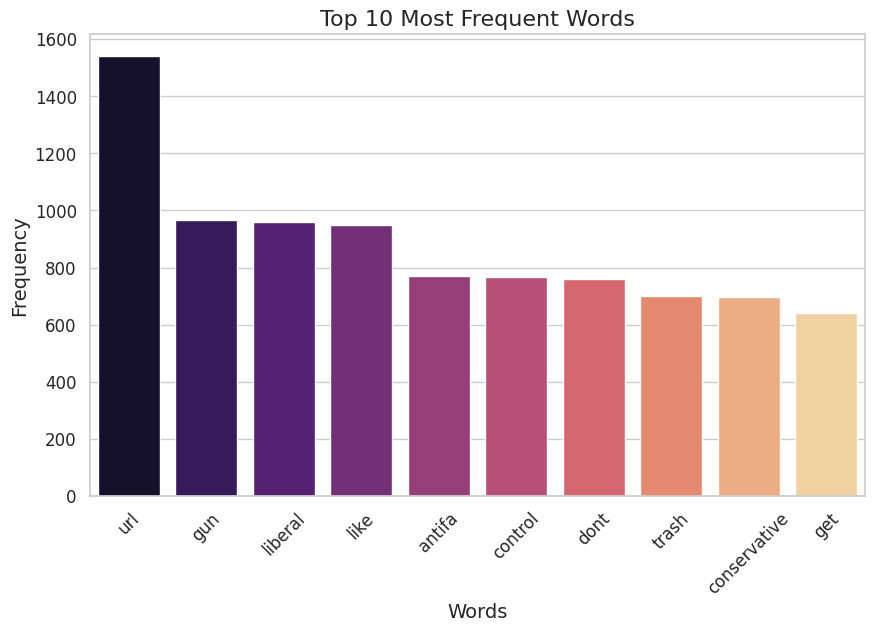

In [15]:
from collections import Counter as FreqCounter

# Since all the text labelled 0 is converted into a single string
word_list_0 = all_text_label_0.split()

#Counting  the frequency of the each word
word_counts = FreqCounter(word_list_0)

#Geting the top 10 most common words
label_0_mostcommonwords = word_counts.most_common(10)
wrds, couts = zip(*label_0_mostcommonwords)  # Unzipping into two lists: words and counts

# Create a DataFrame for better handling with Seaborn
word_freq_llm_offendata = llm_pds.DataFrame({
    'Words': wrds,
    'Frequency': couts
})

#Ploting the top 10 most common words
llm_mtplot.figure(figsize=(10, 6))
llm_senb.barplot(x='Words', y='Frequency', hue='Words', data=word_freq_llm_offendata, dodge=False, palette='magma')
llm_mtplot.title('Top 10 Most Frequent Words', fontsize=16)
llm_mtplot.xlabel('Words', fontsize=14)
llm_mtplot.ylabel('Frequency', fontsize=14)
llm_mtplot.xticks(fontsize=12, rotation=45)
llm_mtplot.yticks(fontsize=12)
llm_mtplot.legend([],[], frameon=False)
llm_mtplot.show()

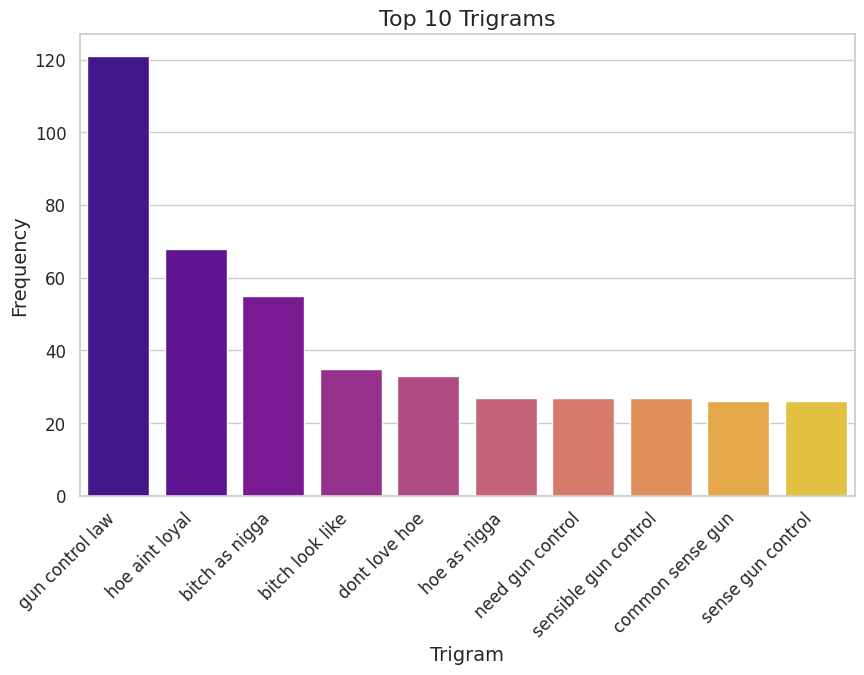

In [16]:
from sklearn.feature_extraction.text import CountVectorizer as CV

alltexts = llm_offendata['text']

# Use CountVectorizer to extract Trigrams
llm_vectorizer = CV(ngram_range=(3, 3))
X = llm_vectorizer.fit_transform(alltexts)

# Get the Trigrams and their counts
Trigrams_text = llm_vectorizer.get_feature_names_out()
counts = X.toarray().sum(axis=0)

# Create a DataFrame for bettr handling
Trigram_freq_llm_offendata = llm_pds.DataFrame({
    'Trigram': Trigrams_text,
    'Frequency': counts
})

# Get the top 10 Trigrams by frequency
top_10_Trigrams = Trigram_freq_llm_offendata.nlargest(10, 'Frequency')

# Plot the top 10 trigrams
llm_mtplot.figure(figsize=(10, 6))
llm_senb.barplot(x=top_10_Trigrams['Trigram'], y=top_10_Trigrams['Frequency'], palette='plasma', hue=None, legend=False)
llm_mtplot.title('Top 10 Trigrams', fontsize=16)
llm_mtplot.xlabel('Trigram', fontsize=14)
llm_mtplot.ylabel('Frequency', fontsize=14)
llm_mtplot.xticks(fontsize=12, rotation=45, ha='right')
llm_mtplot.yticks(fontsize=12)
llm_mtplot.show()

To understand the text patterns in a deeper manner the words are combined into sets of 3. This shows that most frequently occuring words revolve around 'gun control' and other offensive phrases.

# Model Building

The dataset contains the text and their corresponding labels. The data is then to be split into 70% for training and the remaining 30% for testing. Randomstate is used to make sure that data always result in same split. The split is based on the labels.


In [17]:
from sklearn.model_selection import train_test_split as DataSplit

# splitting the data
train_llm_offendata, test_llm_offendata = DataSplit(llm_offendata[['text','label']], test_size=0.3, random_state=42, stratify=llm_offendata['label'])

In [18]:
from transformers import DistilBertTokenizer as DistilBT, DistilBertForSequenceClassification as DistilBSC

# Load the tokenizer and model
llmtokeniz = DistilBT.from_pretrained('Umesh/distilbert-bbc-news-classification')
mdldstil = DistilBSC.from_pretrained(
    'Umesh/distilbert-bbc-news-classification',
    num_labels=2,
    ignore_mismatched_sizes=True  # Ignore the size mismatch in the classifier layer
)

tokenizer_config.json:   0%|          | 0.00/360 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/851 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at Umesh/distilbert-bbc-news-classification and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([5, 768]) in the checkpoint and torch.Size([2, 768]) in the model instantiated
- classifier.bias: found shape torch.Size([5]) in the checkpoint and torch.Size([2]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [19]:
from datasets import Dataset

#Converting the pandas DataFrame to Hugging Face Dataset
llm_TrainDataset = Dataset.from_pandas(train_llm_offendata)
llm_TestDataset = Dataset.from_pandas(test_llm_offendata)

#Tokenization function
def offnd_TknzFnct(examp):
    return llmtokeniz(examp['text'], padding='max_length', truncation=True)

#Apply the tokenizer to the datasets
llm_TrainDataset = llm_TrainDataset.map(offnd_TknzFnct, batched=True)
llm_TestDataset = llm_TestDataset.map(offnd_TknzFnct, batched=True)

#Remove the text column as it's not needed anymore
llm_TrainDataset = llm_TrainDataset.remove_columns(['text'])
llm_TestDataset = llm_TestDataset.remove_columns(['text'])

#Rename the label column to the labels
llm_TrainDataset = llm_TrainDataset.rename_column('label', 'labels')
llm_TestDataset = llm_TestDataset.rename_column('label', 'labels')

#Seting up the format for PyTorch
llm_TrainDataset.set_format('torch')
llm_TestDataset.set_format('torch')

Map:   0%|          | 0/25615 [00:00<?, ? examples/s]

Map:   0%|          | 0/10978 [00:00<?, ? examples/s]

In [20]:
from transformers import Trainer, TrainingArguments

# Define training arguments optimized for faster runtime
llm_training_args = TrainingArguments(
    output_dir='./results',                   # Directory to save the results
    evaluation_strategy='steps',              # Evaluate every few steps instead of every epoch
    eval_steps=200,                           # Number of steps before each evaluation
    learning_rate=3e-5,                       # Slightly higher learning rate for faster convergence
    per_device_train_batch_size=32,           # Larger batch size for faster processing (if memory allows)
    per_device_eval_batch_size=32,            # Larger evaluation batch size for faster processing
    num_train_epochs=10,                      # Reduce the number of epochs
    weight_decay=0.01,                        # Weight decay to regularize the model
    logging_dir='./logs',                     # Directory to save the logs
    logging_steps=100,                        # Log every 100 steps to reduce logging overhead
    save_total_limit=2,                       # Keep only the last 2 checkpoints to save disk space
    fp16=True,                                # Use mixed precision (if supported) for faster training
    dataloader_num_workers=4                  # Use multiple CPU cores for data loading
)

# Initialize the trainer
trainer = Trainer(
    model=mdldstil,
    args=llm_training_args,
    train_dataset=llm_TrainDataset,
    eval_dataset=llm_TestDataset,
)

# Fine-tune the model
trainer.train()

Step,Training Loss,Validation Loss
200,0.284100,0.262659
400,0.256600,0.254603
600,0.250100,0.256100
800,0.237400,0.248522
1000,0.186100,0.314254
1200,0.209800,0.255583
1400,0.220100,0.248763
1600,0.199800,0.255759
1800,0.124100,0.350410
2000,0.144000,0.300803


TrainOutput(global_step=8010, training_loss=0.08553441952304745, metrics={'train_runtime': 1174.9601, 'train_samples_per_second': 218.007, 'train_steps_per_second': 6.817, 'total_flos': 3.39315241657344e+16, 'train_loss': 0.08553441952304745, 'epoch': 10.0})

In [21]:
# Get predictions for the test dataset
llm_predictions_train = trainer.predict(llm_TrainDataset)

# Access the predicted logits
predicted_logits_train = llm_predictions_train.predictions

In [26]:
# Get predictions for the test dataset
predictions = trainer.predict(llm_TestDataset)

# Access the predicted logits
predicted_logits = predictions.predictions

In [29]:
import numpy as llm_nyp #imported the numpy as llm_nyp for numerical operations.
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix, roc_curve, auc) #imported the evaluation metrics from sklearn.

def evaluate_model(predictions, TrueLabels):
    # Convert logits to predicted labels
    PredLabels = llm_nyp.argmax(predictions.predictions, axis=1)

    # Compute metrics
    accu = accuracy_score(TrueLabels, PredLabels)
    precis = precision_score(TrueLabels, PredLabels)
    recal = recall_score(TrueLabels, PredLabels)
    f1 = f1_score(TrueLabels, PredLabels)
    RocAuc = roc_auc_score(TrueLabels, predictions.predictions[:, 1])

    print("Accuracy: ", accu)
    print("Precision: ", precis)
    print("Recall: ", recal)
    print("F1 Score: ", f1)
    print("ROC AUC: ", RocAuc)
    print()

    # Compute confusion matrix
    cm = confusion_matrix(TrueLabels, PredLabels)

    # Plot confusion matrix heatmap
    llm_mtplot.figure(figsize=(8, 6))
    llm_senb.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    llm_mtplot.title('Confusion Matrix', fontsize=16)
    llm_mtplot.xlabel('Predicted Label', fontsize=14)
    llm_mtplot.ylabel('True Label', fontsize=14)
    llm_mtplot.show()

    print()
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(TrueLabels, predictions.predictions[:, 1])
    roc_auc_value = auc(fpr, tpr)

    # Plot ROC curve
    llm_mtplot.figure(figsize=(8, 6))
    llm_mtplot.plot(fpr, tpr, color='#ff6666', lw=2, label=f'ROC curve (area = {roc_auc_value:.2f})')
    llm_mtplot.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    llm_mtplot.xlim([0.0, 1.0])
    llm_mtplot.ylim([0.0, 1.05])
    llm_mtplot.xlabel('False Positive Rate', fontsize=14)
    llm_mtplot.ylabel('True Positive Rate', fontsize=14)
    llm_mtplot.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
    llm_mtplot.legend(loc='lower right')
    llm_mtplot.show()

Accuracy:  0.9982822564903376
Precision:  0.9993329694985144
Recall:  0.9980015745170472
F1 Score:  0.9986668282632409
ROC AUC:  0.9999864405720545



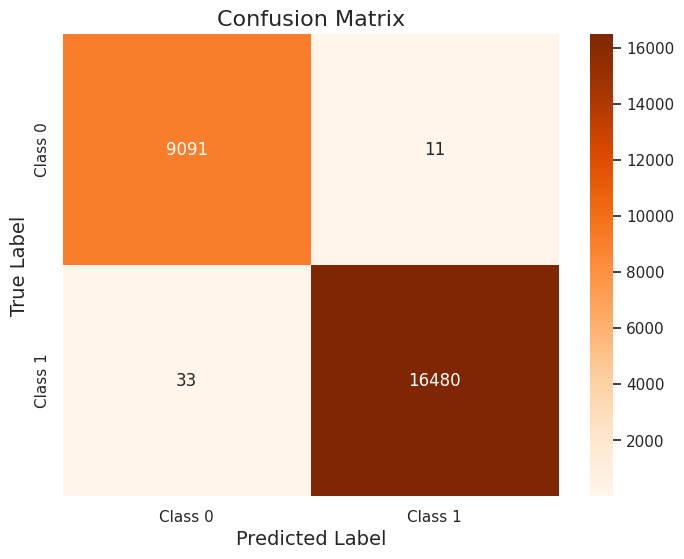

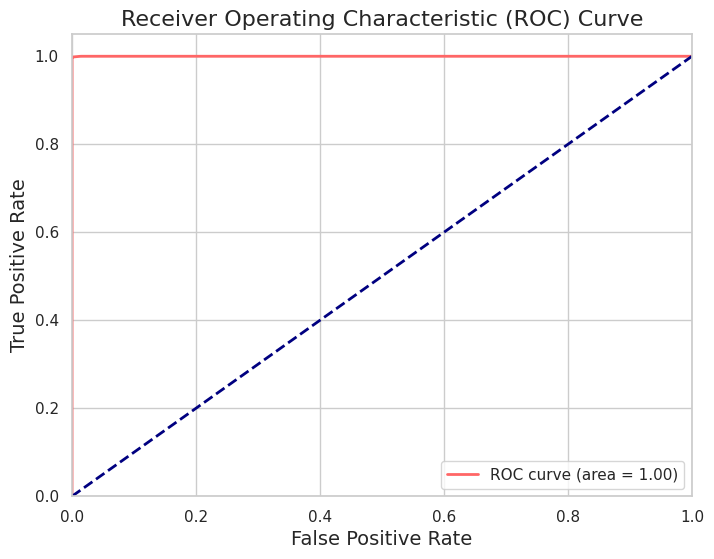

In [28]:
evaluate_model(llm_predictions_train, train_llm_offendata['label'])

The model performs very well, with a large majority of the predictions being correct (16,480 + 9,091 correct predictions out of 25,615 total samples). The model makes very few errors, with only 11 False Positives and 33 False Negatives.
This confusion matrix shows that the model still performs well across both classes, given the low number of misclassifications.

Accuracy:  0.8904171980324285
Precision:  0.919451585261354
Recall:  0.9097075031793133
F1 Score:  0.9145535904538675
ROC AUC:  0.943146101855312



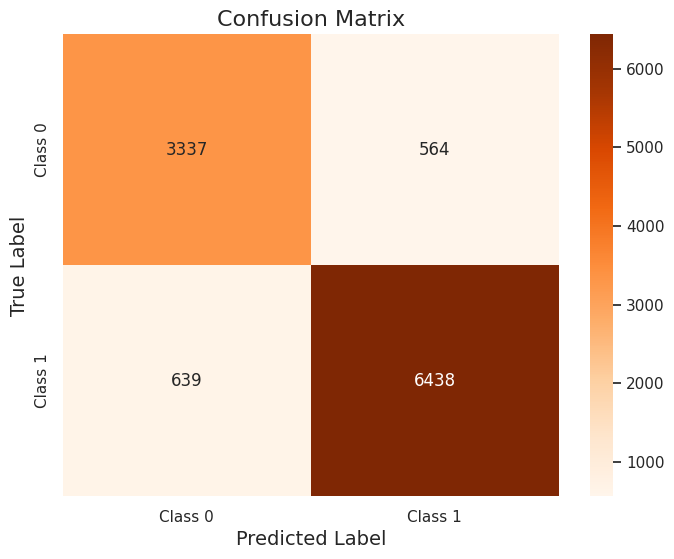

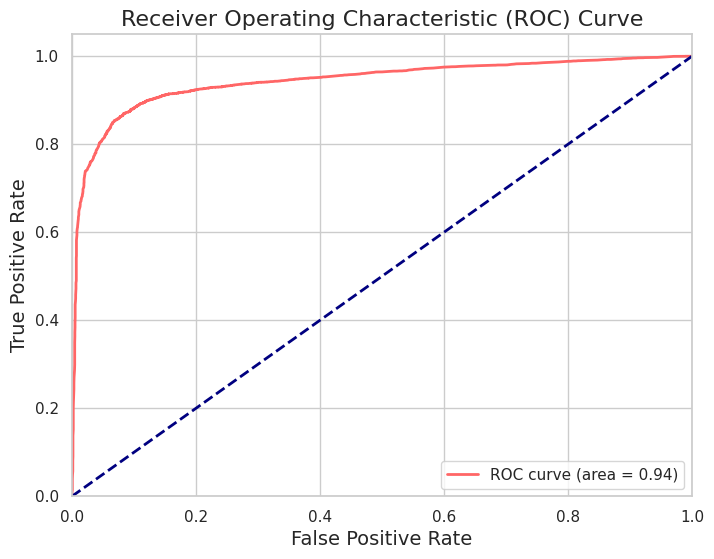

In [30]:

evaluate_model(predictions, test_llm_offendata['label'])

The AUC value is 0.94. This means that there is a 94% chance that the model will correctly distinguish between a randomly chosen positive instance and a randomly chosen negative instance.
An AUC of 0.94 is considered excellent, indicating that the model has a high capacity to differentiate between the two classes.